# Summary
* Correct types save space and enable convenient math, strong and date functionality
* Chaining operations will:
>* Make code readable
>* Remove bugs
>* Easier to debug
* Don't mutate (there's no point). Embrace chaining
* `.apply` is slow for math
* Aggregations are powerful. Play wait them until they make sense.


In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import pandas as pd

## Recipe:
1. run through dataframe and clean using:
> assign, astype, drop, etc

2. Use a single function to encapsulate step 1. This is now reusable!

In [2]:
pd.options.display.min_rows=20

In [3]:
autos = pd.read_csv('/Users/ficus/Data/autos/vehicles.csv')

/Users/ficus/opt/anaconda3/envs/ml-starter/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
autos

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
5,14.982273,0.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
6,13.184400,0.0,0.0,0.0,22,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
7,13.733750,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
8,12.677308,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
9,13.184400,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
autos.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [6]:
cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive','eng_dscr', 'fuelCost08','make',
       'model',  'trany',  'range', 'createdOn', 'year']

In [7]:
autos[cols].dtypes # pandas will treat each column as a data type that numpy can read.

city08          int64
comb08          int64
highway08       int64
cylinders     float64
displ         float64
drive          object
eng_dscr       object
fuelCost08      int64
make           object
model          object
trany          object
range           int64
createdOn      object
year            int64
dtype: object

In [8]:
autos[cols].memory_usage(deep=True)

Index             128
city08         329152
comb08         329152
highway08      329152
cylinders      329152
displ          329152
drive         3028369
eng_dscr      2135693
fuelCost08     329152
make          2606267
model         2813134
trany         2933276
range          329152
createdOn     3497240
year           329152
dtype: int64

In [9]:
autos[cols].memory_usage(deep=True).sum()

19647323

# Let's look into Int data types

In [10]:
autos[cols].select_dtypes(int).describe()

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


In [11]:
# Let's rewrite line 15 with CHAINING
(autos
 [cols] # get columns we want
 .select_dtypes(int) # select columns with int data types
 .describe()
)

#count is number of non-missing numbers

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


## We can save most of the data using int8 to save some memory
Look at the min,max values. 

In [12]:
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [13]:
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [14]:
(autos
 [cols]
 .astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16'})
 .select_dtypes([int, 'int8']) #int is default int64
 .describe()
)

,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000
mean,24.504667,2362.335942,0.793506,2001.535266
std,7.730364,654.981925,13.041592,11.142414
min,9.000000,500.000000,0.000000,1984.000000
25%,20.000000,1900.000000,0.000000,1991.000000
50%,24.000000,2350.000000,0.000000,2002.000000
75%,28.000000,2700.000000,0.000000,2011.000000
max,124.000000,7400.000000,370.000000,2020.000000


In [15]:
(autos
 [cols]
 .astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16'})
 .select_dtypes(['integer'])
 .describe()
)

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


## Let us look at floats

In [16]:
(autos
 [cols]
 .select_dtypes(['float'])
)

,cylinders,displ
0,4.0,2.0
1,12.0,4.9
2,4.0,2.2
3,8.0,5.2
4,4.0,2.2
5,4.0,1.8
6,4.0,1.8
7,4.0,1.6
8,4.0,1.6
9,4.0,1.8


##  Cylinders -- let us look at the number of missing and non-missing values

In [17]:
autos.cylinders.describe() # we can see there are some missing values as shown by count in comparison to the number of rows above.

count    40938.000000
mean         5.717084
std          1.755517
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: cylinders, dtype: float64

In [18]:
autos.cylinders.value_counts(dropna=False)

4.0     15938
6.0     14284
8.0      8801
5.0       771
12.0      626
3.0       279
NaN       206
10.0      170
2.0        59
16.0       10
Name: cylinders, dtype: int64

In [19]:
# (autos
#  [cols]
#  .query('cylinders.isna()')
# )  #NOT WORKING

In [20]:
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16') #displ = displacement
        )
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16',
         'fuelCost08': 'int16', 'range': 'int16', 'year':'int16'})
 .describe()
    
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,4.114400e+04,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,5.688460,inf,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,1.797009,1.373047e+00,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,0.000000,0.000000e+00,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,2.199219e+00,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,6.000000,3.000000e+00,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,6.000000,4.300781e+00,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,16.000000,8.398438e+00,7400.000000,370.000000,2020.000000


In [21]:
autos[cols].dtypes # for some reason the new data type for 'displ' is not showing correctly -- need to check this!!

city08          int64
comb08          int64
highway08       int64
cylinders     float64
displ         float64
drive          object
eng_dscr       object
fuelCost08      int64
make           object
model          object
trany          object
range           int64
createdOn      object
year            int64
dtype: object

In [22]:
(autos
[cols]
.select_dtypes(object)
)

,drive,eng_dscr,make,model,trany,createdOn
0,Rear-Wheel Drive,(FFS),Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
1,Rear-Wheel Drive,(GUZZLER),Ferrari,Testarossa,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
2,Front-Wheel Drive,(FFS),Dodge,Charger,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
3,Rear-Wheel Drive,NaN,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
4,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",Subaru,Legacy AWD Turbo,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
5,Front-Wheel Drive,(FFS),Subaru,Loyale,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
6,Front-Wheel Drive,(FFS),Subaru,Loyale,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
7,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
8,Front-Wheel Drive,(FFS),Toyota,Corolla,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
9,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 4-spd,Tue Jan 01 00:00:00 EST 2013


In [23]:
autos.model.nunique()

4058

In [24]:
# looks categorical
(autos.drive.value_counts(dropna=False))

Front-Wheel Drive             14236
Rear-Wheel Drive              13831
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                3015
4-Wheel Drive                  1460
NaN                            1189
2-Wheel Drive                   507
Part-time 4-Wheel Drive         258
Name: drive, dtype: int64

In [25]:
# # where are the values missing for drive?
# (autos
# [cols]
# .query('drive.isna()')) #NOT WORKING

In [26]:
# drive and make (in .astype) to category
(autos
[cols].groupby('year')
.drive
.unique())

year
1984    [nan, 2-Wheel Drive, Rear-Wheel Drive, 4-Wheel...
1985    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1986    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1987    [Rear-Wheel Drive, 4-Wheel or All-Wheel Drive,...
1988    [Front-Wheel Drive, 4-Wheel or All-Wheel Drive...
1989    [Rear-Wheel Drive, 4-Wheel or All-Wheel Drive,...
1990    [Front-Wheel Drive, Rear-Wheel Drive, 4-Wheel ...
1991    [Rear-Wheel Drive, 4-Wheel or All-Wheel Drive,...
1992    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1993    [4-Wheel or All-Wheel Drive, Front-Wheel Drive...
1994    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1995    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1996    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1997    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1998    [Rear-Wheel Drive, 4-Wheel or All-Wheel Drive,...
1999    [Rear-Wheel Drive, 4-Wheel or All-Wheel Drive,...
2000    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
2001    [

In [27]:
# drive and make (in .astype) to category
(autos
[cols].groupby('year')
.drive
.nunique())

year
1984    3
1985    4
1986    4
1987    3
1988    3
1989    3
1990    3
1991    3
1992    3
1993    3
1994    3
1995    4
1996    3
1997    4
1998    4
1999    4
2000    4
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    3
2009    4
2010    6
2011    5
2012    5
2013    5
2014    5
2015    5
2016    5
2017    5
2018    5
2019    5
2020    5
Name: drive, dtype: int64

In [28]:
# drive and make (in .astype) to category

(autos
[cols].groupby('year')
.drive
.unique()) # can be better written



year
1984    [nan, 2-Wheel Drive, Rear-Wheel Drive, 4-Wheel...
1985    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1986    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1987    [Rear-Wheel Drive, 4-Wheel or All-Wheel Drive,...
1988    [Front-Wheel Drive, 4-Wheel or All-Wheel Drive...
1989    [Rear-Wheel Drive, 4-Wheel or All-Wheel Drive,...
1990    [Front-Wheel Drive, Rear-Wheel Drive, 4-Wheel ...
1991    [Rear-Wheel Drive, 4-Wheel or All-Wheel Drive,...
1992    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1993    [4-Wheel or All-Wheel Drive, Front-Wheel Drive...
1994    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1995    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1996    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1997    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
1998    [Rear-Wheel Drive, 4-Wheel or All-Wheel Drive,...
1999    [Rear-Wheel Drive, 4-Wheel or All-Wheel Drive,...
2000    [Rear-Wheel Drive, Front-Wheel Drive, 4-Wheel ...
2001    [

In [29]:
# drive and make (in .astype) to category
(autos
[cols].groupby('year')
.drive
.nunique()
.sum())

149

## Can we decrese our memory usage even more?

In [30]:
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'), 
         drive = autos.drive.fillna('Other').astype('category') #let's change drive to categorical
                                                                #this should decrease our memory usage
        )
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16',
         'fuelCost08': 'int16', 'range': 'int16', 'year':'int16', 'make':'category'})
.memory_usage(deep=True)
.sum()
) # was 19,647,323 bytes at the start

12093275

## Check if transmission types has NaNs

In [31]:
autos.trany.value_counts(dropna=False) #Let us check if transmission types has NaNs

Automatic 4-spd                     11047
Manual 5-spd                         8361
Automatic 3-spd                      3151
Automatic (S6)                       3106
Manual 6-spd                         2757
Automatic 5-spd                      2203
Automatic (S8)                       1665
Automatic 6-spd                      1619
Manual 4-spd                         1483
Automatic (S5)                        833
Automatic (variable gear ratios)      826
Automatic 7-spd                       724
Automatic 8-spd                       433
Automatic (AM-S7)                     424
Automatic (S7)                        327
Automatic 9-spd                       293
Automatic (AM7)                       245
Automatic (S4)                        233
Automatic (AV-S6)                     208
Automatic (A1)                        201
Automatic (AM6)                       151
Automatic (AV-S7)                     139
Automatic (S10)                       124
Automatic (AM-S6)                 

## Assign is important
To prevent mutation, especially now that we have filtered/modified parts of the dataset.

"The Pandas assign method enables us to add new columns to a dataframe. We provide the input dataframe, tell assign how to calculate the new column, and it **creates a NEW dataframe** with the additional new column."

In [32]:
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'), 
         drive = autos.drive.fillna('Other').astype('category'), 
         automatic = autos.trany.str.contains('Auto'),
         speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8')
        )
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16',
         'fuelCost08': 'int16', 'range': 'int16', 'year':'int16', 'make':'category'})
.drop(columns=['trany'])
.memory_usage(deep=True)
.sum()
) 

10631047

we can assign to a new variable if we want...

In [33]:
autos_df2 = (autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'), 
         drive = autos.drive.fillna('Other').astype('category'), 
         automatic = autos.trany.str.contains('Auto'),
         speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8')
        )
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16',
         'fuelCost08': 'int16', 'range': 'int16', 'year':'int16', 'make':'category'})
.drop(columns=['trany']))

In [34]:
autos_df2.speeds.unique()

array([ 5,  3,  4,  6, 20,  7,  8,  1,  9,  0], dtype=int8)

In [35]:
autos_df2.query('speeds ==20').sample(5)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,range,createdOn,year,automatic,speeds
33925,31,35,40,4,1.500000,Front-Wheel Drive,SIDI,1200,Honda,Civic 2Dr,0,Wed Oct 03 00:00:00 EDT 2018,2019,True,20
26143,30,33,37,4,1.200195,Front-Wheel Drive,NaN,1300,Chevrolet,Spark,0,Tue Jan 01 00:00:00 EST 2013,2014,True,20
24136,20,21,23,4,2.400391,4-Wheel Drive,Off Road Package,2000,Jeep,Patriot 4WD,0,Tue Jan 01 00:00:00 EST 2013,2012,True,20
25352,22,25,29,4,2.400391,All-Wheel Drive,NaN,1700,Suzuki,Kizashi AWD,0,Tue Jan 01 00:00:00 EST 2013,2013,True,20
26934,22,24,26,4,2.000000,Front-Wheel Drive,NaN,1750,Jeep,Patriot FWD,0,Tue Jan 01 00:00:00 EST 2013,2014,True,20


## Dates

### Changing a time-zone

In [36]:
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'), 
         drive = autos.drive.fillna('Other').astype('category'), 
         automatic = autos.trany.str.contains('Auto'),
         speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
         createdOn=pd.to_datetime(autos.createdOn).dt.tz_localize('America/New_York')#('Australia/Sydney') #change time-zone
        )
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16',
         'fuelCost08': 'int16', 'range': 'int16', 'year':'int16', 'make':'category'})
.drop(columns=['trany']))

/Users/ficus/opt/anaconda3/envs/ml-starter/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/ficus/opt/anaconda3/envs/ml-starter/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,range,createdOn,year,automatic,speeds
0,19,21,25,4,2.000000,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5
1,9,11,14,12,4.898438,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5
2,23,27,33,4,2.199219,Front-Wheel Drive,(FFS),1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5
3,10,11,12,8,5.199219,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5
5,21,22,24,4,1.799805,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,3
6,22,25,29,4,1.799805,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,5
7,23,24,26,4,1.599609,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,3
8,23,26,31,4,1.599609,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,5
9,23,25,30,4,1.799805,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,4


In [37]:
# Fix date warnings - move on to eng_descr
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'), 
         drive = autos.drive.fillna('Other').astype('category'), 
         automatic = autos.trany.str.contains('Auto'),
         speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
         createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                    ' EST': '-05:00'}, regex=True))
        )
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16',
         'fuelCost08': 'int16', 'range': 'int16', 'year':'int16', 'make':'category'})
.drop(columns=['trany'])
.eng_dscr
.value_counts(dropna = False)
)

NaN                                 16153
(FFS)                                8827
SIDI                                 5526
(FFS) CA model                        926
(FFS)      (MPFI)                     734
FFV                                   701
(FFS,TRBO)                            666
(350 V8) (FFS)                        411
(GUZZLER)  (FFS)                      366
SOHC                                  354
                                    ...  
B234L/R4 (FFS,TRBO)                     1
GUZZLER V8 FFS,TURBO                    1
4.6M FFS MPFI                           1
CNG FFS                                 1
POLICE FFS MPFI                         1
B308E5 FFS,TURBO                        1
5.4E-R FFS MPFI                         1
V-6 FFS                                 1
(GUZZLER)  (FFS)      (S-CHARGE)        1
R-ENG (FFS,TRBO)                        1
Name: eng_dscr, Length: 558, dtype: int64

In [38]:
#adds `ffs` column and deletes 'trany' column 
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'), 
         drive = autos.drive.fillna('Other').astype('category'), 
         automatic = autos.trany.str.contains('Auto'),
         speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
         createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                    ' EST': '-05:00'}, regex=True)),
         ffs=autos.eng_dscr.str.contains('FFS') #feedback-fuel system
        )
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16',
         'fuelCost08': 'int16', 'range': 'int16', 'year':'int16', 'make':'category'})
.drop(columns=['trany'])
)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.000000,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.898438,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.199219,Front-Wheel Drive,(FFS),1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.199219,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True
5,21,22,24,4,1.799805,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,3,True
6,22,25,29,4,1.799805,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,5,True
7,23,24,26,4,1.599609,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,3,True
8,23,26,31,4,1.599609,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,5,True
9,23,25,30,4,1.799805,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,4,True


In [39]:
#adds `ffs` column and deletes 'trany' column 
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'), 
         drive = autos.drive.fillna('Other').astype('category'), 
         automatic = autos.trany.str.contains('Auto'),
         speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
         createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                    ' EST': '-05:00'}, regex=True)),
         ffs=autos.eng_dscr.str.contains('FFS') #feedback-fuel system
        )
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16',
         'fuelCost08': 'int16', 'range': 'int16', 'year':'int16', 'make':'category'})
.drop(columns=['trany', 'eng_dscr'])
 .memory_usage(deep=True)
 .sum()
)

8676214

# Let's put everything into a function!

Chaining is also called "flow" programming. Rather tahn making intermediate variables, just leverage the fact that most operations return a new object and work on that. 

The chain should read like a recipe of ordered steps. Pretty much what we've been doing above and in the next cell below. 

Leverage pipe, whenever you can't get to an endpoint with a chain: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pipe.html

In [40]:
def tweak_autos(autos):
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive','eng_dscr', 'fuelCost08','make',
       'model',  'trany',  'range', 'createdOn', 'year']
    return (autos
     [cols]
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
             displ=autos.displ.fillna(0).astype('float16'), 
             drive = autos.drive.fillna('Other').astype('category'), 
             automatic = autos.trany.str.contains('Auto'),
             speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
             createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                        ' EST': '-05:00'}, regex=True)),
             ffs=autos.eng_dscr.str.contains('FFS') #feedback-fuel system
            )
    .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16',
             'fuelCost08': 'int16', 'range': 'int16', 'year':'int16', 'make':'category'})
    .drop(columns=['trany', 'eng_dscr'])
           )


In [41]:
tweak_autos(autos).head(5)

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.000000,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.898438,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.199219,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.199219,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True


 ## Debugging and the power of chaining

In [65]:
# easy to debug
# - assign to var (df3)
# - comment out
# - pipe to display

from IPython.display import display

def get_var(df, var_name):
    '''create global key with var_name and assign df object --> returns DataFrame into globals namespace '''
    globals()[var_name] = df
    return df

def tweak_autos(autos):
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive','eng_dscr', 'fuelCost08','make',
       'model',  'trany',  'range', 'createdOn', 'year']
    return (autos
     [cols]
     # create var
     .pipe(get_var,'df3')
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
             displ=autos.displ.fillna(0).astype('float16'), 
             drive = autos.drive.fillna('Other').astype('category'), 
             automatic = autos.trany.str.contains('Auto'),
             speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
             createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                        ' EST': '-05:00'}, regex=True)),
             ffs=autos.eng_dscr.str.contains('FFS') #feedback-fuel system
            )
     #debug pipe
    .pipe(lambda df: display(df) or df) #this is like a breakpoint
    .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16',
             'fuelCost08': 'int16', 'range': 'int16', 'year':'int16', 'make':'category'})
    .drop(columns=['trany', 'eng_dscr'])
           )
autos2 = tweak_autos(autos)


,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.000000,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.898438,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.199219,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.199219,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5,True
5,21,22,24,4,1.799805,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1993,True,3,True
6,22,25,29,4,1.799805,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5,True
7,23,24,26,4,1.599609,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1993,True,3,True
8,23,26,31,4,1.599609,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5,True
9,23,25,30,4,1.799805,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,Automatic 4-spd,0,2013-01-01 00:00:00-05:00,1993,True,4,True


In [66]:
#Let us look at intermediate step by calling 'df3'
df3.head(5)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
0,19,21,25,4.0,2.0,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
1,9,11,14,12.0,4.9,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
2,23,27,33,4.0,2.2,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
3,10,11,12,8.0,5.2,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
4,17,19,23,4.0,2.2,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993


## Don't Mutate

>"you are missing the point, inplace rarel actually does something inplace, 
you are thinking that you are saving memory but you are not"

>jreback - Pandas core dev

https://github.com/pandas-dev/pandas/issues/16529#issuecomment-676518136

* in general no performance benefits
* Prohibits chaining
* SettingWithCopyWarning

## Don't Apply (if you can)

Generally, categorical can speed things up, but this needs to be tested across machines. 

- If using numerical avoid `apply`
- If using strings some operations like `isin` may be faster than `apply`.
- Avoid using `where` with strings since it will be slower than apply. `where` works better with numbers. 
- Avoid for loops  -- use `where` and `np.select` to avoid using for loops.

In [67]:
%%timeit
#Don't do this, as it will look into each entry of the DataFrame and apply conversion to each one at at time. 
#This will be slow.
def to_lper100km(val):
    return 235.215/val
autos2.city08.apply(to_lper100km) 

5.14 ms ± 90.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [68]:
%%timeit
# same results but not as quickly
235.215/autos2.city08

60.2 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [69]:
def is_american(val):
    return val in {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}

In [70]:
%%timeit
autos2.make.apply(is_american)

801 µs ± 25.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [71]:
%%timeit
autos2.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'})

486 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [72]:
%%timeit
# string timings
autos2.make.astype(str).isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}) #used to be categorical -- we did this before.

5.83 ms ± 241 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [73]:
%%timeit
autos2.make.astype(str).apply(is_american)

8.38 ms ± 47.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [74]:
def country(val):
    if val in {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}:
        return 'US'
    return 'Other'

In [75]:
%%timeit
# Apply might be ok for strings, since they are not vectorized...
(autos2.assign(country=autos2.make.apply(country)) #returns a string
)

1.9 ms ± 4.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [76]:
%%timeit
#In general the `where` method works better with digits/numbers
#In this case, using `where` even without `apply` is slower since we're working with strings
values = {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}
(autos2
 .assign(country='US') #doesn't use apply as before and uses where.
 .assign(country=lambda df_:df_.country.where(df_.make.isin(values), 'Other'))
)

5.33 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [77]:
# (autos2
#  .assign(country=np.select([autos2.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'})],['US'], 'Other')) #returns a list to the dataframe
# )
values2 = 'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'
(autos2
 .assign(country=np.select([autos2.make.isin(values2)],['US'], 'Other')) #returns a list to the dataframe
)

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs,country
0,19,21,25,4,2.000000,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True,Other
1,9,11,14,12,4.898438,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False,Other
2,23,27,33,4,2.199219,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True,US
3,10,11,12,8,5.199219,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN,US
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True,Other
5,21,22,24,4,1.799805,Front-Wheel Drive,1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,3,True,Other
6,22,25,29,4,1.799805,Front-Wheel Drive,1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,5,True,Other
7,23,24,26,4,1.599609,Front-Wheel Drive,1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,3,True,Other
8,23,26,31,4,1.599609,Front-Wheel Drive,1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,5,True,Other
9,23,25,30,4,1.799805,Front-Wheel Drive,1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,4,True,Other


In [78]:
# conditionlist for np.select
[autos2.make.isin(values2)],['US'], 'Other'

([0        False
  1        False
  2         True
  3         True
  4        False
  5        False
  6        False
  7        False
  8        False
  9        False
           ...  
  41134    False
  41135    False
  41136    False
  41137    False
  41138    False
  41139    False
  41140    False
  41141    False
  41142    False
  41143    False
  Name: make, Length: 41144, dtype: bool],
 ['US'],
 'Other')

In [79]:
(autos2
 .assign(country=np.where(autos2.make.isin(values2),'US', 'Other')) #returns a list to the dataframe
)

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs,country
0,19,21,25,4,2.000000,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True,Other
1,9,11,14,12,4.898438,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False,Other
2,23,27,33,4,2.199219,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True,US
3,10,11,12,8,5.199219,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN,US
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True,Other
5,21,22,24,4,1.799805,Front-Wheel Drive,1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,3,True,Other
6,22,25,29,4,1.799805,Front-Wheel Drive,1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,5,True,Other
7,23,24,26,4,1.599609,Front-Wheel Drive,1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,3,True,Other
8,23,26,31,4,1.599609,Front-Wheel Drive,1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,5,True,Other
9,23,25,30,4,1.799805,Front-Wheel Drive,1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,4,True,Other


In [80]:
values3 =[{'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}] #this doesn't seem to work for the conditionlist in np.select and np.where
values3

[{'Chevrolet', 'Dodge', 'Ford', 'GMC', 'Tesla'}]

## Master Aggregation

* unstacking is helpful to rotate rows by mapping to columns

Let's compare mileadge by country by year...

In [105]:
(autos2
 .groupby('year')
 .mean()
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,speeds
year,,,,,,,,
1984,17.982688,19.881874,23.075356,5.385438,3.164062,2313.543788,0.000000,3.928208
1985,17.878307,19.808348,23.042328,5.375661,3.164062,2334.509112,0.000000,3.924750
1986,17.665289,19.550413,22.699174,5.425620,3.183594,2354.049587,0.000000,3.984298
1987,17.310345,19.228549,22.445068,5.412189,3.173828,2403.648757,0.000000,4.037690
1988,17.333628,19.328319,22.702655,5.461947,3.195312,2387.035398,0.000000,4.129204
1989,17.143972,19.125759,22.465742,5.488291,3.208984,2433.434519,0.000000,4.166522
1990,17.033395,19.000928,22.337662,5.496289,3.216797,2436.178108,0.000000,4.238404
1991,16.848940,18.825972,22.253534,5.598940,3.267578,2490.856890,0.000000,4.301237
1992,16.805531,18.862623,22.439786,5.623550,3.275391,2494.736842,0.000000,4.318466


In [106]:
# watch order of column filtering/aggregation
(autos2
 .groupby('year')
 [['comb08', 'speeds']]
 .mean()
)

,comb08,speeds
year,,
1984,19.881874,3.928208
1985,19.808348,3.924750
1986,19.550413,3.984298
1987,19.228549,4.037690
1988,19.328319,4.129204
1989,19.125759,4.166522
1990,19.000928,4.238404
1991,18.825972,4.301237
1992,18.862623,4.318466


In [107]:
%%timeit
(autos2
 .groupby('year')
 [['comb08', 'speeds']]
 .mean()#calculate mean only after columns of interest have been selected -- faster!
)

1.44 ms ± 44.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [84]:
%%timeit
(autos2
 .groupby('year')
 .mean()#calculate mean for all columns
 [['comb08', 'speeds']]
)

3.83 ms ± 3.91 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Let's plot

<AxesSubplot:xlabel='year'>

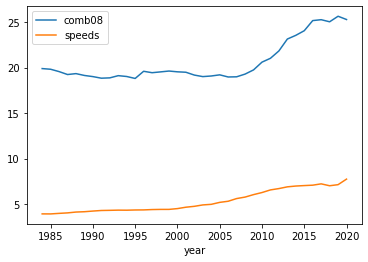

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

(autos2
 .groupby('year')
 [['comb08', 'speeds']]
 .mean()
 .plot()
)

<AxesSubplot:xlabel='year'>

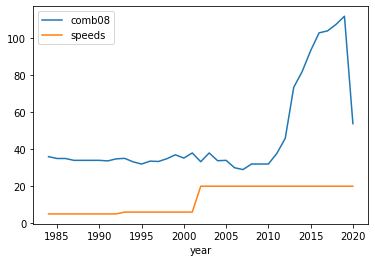

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

(autos2
 .groupby('year')
 [['comb08', 'speeds']]
#  .quantile(.99)
 .std()
 .plot()
)

In [90]:
#Let's group by year and country
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country']) #these become hierarchichal index in pandas
 .mean()
)

city08     comb08  highway08  cylinders     displ  \
year country                                                         
1984 Other    19.384615  21.417330  24.847038   4.908046  2.691406   
     US       16.079232  17.797119  20.669868   6.033613  3.808594   
1985 Other    19.284768  21.373068  24.816777   4.871965  2.636719   
     US       16.275472  18.025157  21.020126   5.949686  3.765625   
1986 Other    19.167183  21.213622  24.650155   4.804954  2.537109   
     US       15.945035  17.645390  20.464539   6.136525  3.925781   
1987 Other    18.633381  20.710414  24.186876   4.825963  2.583984   
     US       15.611722  17.326007  20.208791   6.164835  3.931641   
1988 Other    18.668224  20.814642  24.437695   4.819315  2.531250   
     US       15.577869  17.372951  20.420082   6.307377  4.066406   
...                 ...        ...        ...        ...       ...   
2016 Other    21.903749  24.439716  28.866261   5.493414  2.992188   
     US       25.061818  27.701818  32.265455   5.356364  3.277344   
2017 Other    22.423795  24.910521  29.208456   5.431662  2.919922   
     US       24.003623  26.496377  30.829710   5.532609  3.419922   
2018 Other    22.310442  24.779868  29.042333   5.396990  2.886719   
     US       23.526690  25.925267  30.145907   5.597865  3.390625   
2019 Other    23.084221  25.456922  29.560503   5.315586  2.839844   
     US       24.169014  26.250000  30.042254   5.559859  3.419922   
2020 Other    22.579487  25.174359  29.543590   5.148718  2.693359   
     US       24.071429  26.571429  30.642857   4.000000  1.978516   

               fuelCost08      range    speeds  
year country                                    
1984 Other    2118.125553   0.000000  3.969054  
     US       2578.871549   0.000000  3.872749  
1985 Other    2141.997792   0.000000  3.958057  
     US       2553.899371   0.000000  3.886792  
1986 Other    2149.148607   0.000000  4.069659  
     US       2588.741135   0.000000  3.886525  
1987 Other    2227.318117   0.000000  4.142653  
     US       2630.036630   0.000000  3.902930  
1988 Other    2207.476636   0.000000  4.205607  
     US       2623.258197   0.000000  4.028689  
...                   ...        ...       ...  
2016 Other    2127.608916   1.017224  7.296859  
     US       1960.545455  17.214545  6.301818  
2017 Other    2114.110128   1.243854  7.474926  
     US       2031.884058  15.731884  6.304348  
2018 Other    2121.448730   1.135466  7.391345  
     US       2037.900356  12.537367  5.601423  
2019 Other    2093.659245   2.581801  7.545983  
     US       2093.133803  16.419014  5.647887  
2020 Other    2050.256410   2.446154  7.743590  
     US       1650.000000   0.000000  7.785714  

[74 rows x 8 columns]

In [100]:
# Let's us go ddeper and apply multipe aggregates
def second_to_last(ser):
    return ser.iloc[-2]#return that specific row
#ser.iloc[:-4]

(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 .agg(['min', 'mean', second_to_last])
)


city08                           comb08             \
                min       mean second_to_last    min       mean   
year country                                                      
1984 Other        7  19.384615             14      8  21.417330   
     US           8  16.079232             15      9  17.797119   
1985 Other        7  19.284768             19      8  21.373068   
     US           8  16.275472             14     10  18.025157   
1986 Other        6  19.167183             10      7  21.213622   
     US           9  15.945035             16     10  17.645390   
1987 Other        6  18.633381             12      7  20.710414   
     US           8  15.611722             12      9  17.326007   
1988 Other        6  18.668224             12      7  20.814642   
     US           8  15.577869             14      9  17.372951   
...             ...        ...            ...    ...        ...   
2016 Other       10  21.903749             28     12  24.439716   
     US          11  25.061818             91     12  27.701818   
2017 Other       10  22.423795             21     11  24.910521   
     US          11  24.003623            131     12  26.496377   
2018 Other        9  22.310442             11     11  24.779868   
     US          11  23.526690            120     14  25.925267   
2019 Other        9  23.084221             19     11  25.456922   
     US          11  24.169014            104     14  26.250000   
2020 Other       13  22.579487             17     15  25.174359   
     US          20  24.071429             21     22  26.571429   

                            highway08                           cylinders  \
             second_to_last       min       mean second_to_last       min   
year country                                                                
1984 Other               14         9  24.847038             15         2   
     US                  17        10  20.669868             19         4   
1985 Other               20         9  24.816777             22         0   
     US                  15        10  21.020126             17         3   
1986 Other               11         9  24.650155             12         0   
     US                  17        11  20.464539             19         3   
1987 Other               12         9  24.186876             12         2   
     US                  13        10  20.208791             14         3   
1988 Other               12        10  24.437695             12         2   
     US                  14        10  20.420082             15         3   
...                     ...       ...        ...            ...       ...   
2016 Other               30        13  28.866261             32         0   
     US                  93        16  32.265455             94         0   
2017 Other               24        11  29.208456             28         0   
     US                 126        15  30.829710            120         0   
2018 Other               12        11  29.042333             15         0   
     US                 116        15  30.145907            112         0   
2019 Other               22        14  29.560503             27         0   
     US                 104        15  30.042254            104         0   
2020 Other               20        18  29.543590             24         0   
     US                  24        26  30.642857             28         4   

              ...          range automatic                          speeds  \
              ... second_to_last       min      mean second_to_last    min   
year country  ...                                                            
1984 Other    ...              0     False  0.550840          False      3   
     US       ...              0     False  0.521059          False      3   
1985 Other    ...              0     False  0.554084           True      3   
     US       ...              0     False  0.520755          False      3   
1986 Othe

<AxesSubplot:xlabel='year,country'>

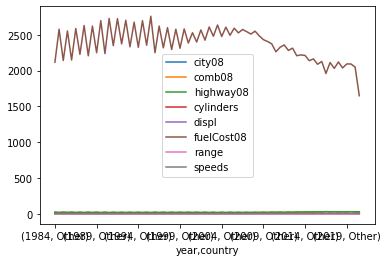

In [101]:
#Let's group by year and country and plot --- this will be messy and we will see afterwards how this can be fixed by unstacking (a.k.a a rotation of the rows being mapped to columns)
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country']) #these become hierarchichal index in pandas
 .mean()
 .plot()
)

## Unstacking and plotting

In [104]:
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country']) #these become hierarchichal index in pandas
 .mean()
 .unstack()
)

city08                comb08             highway08             \
country      Other         US      Other         US      Other         US   
year                                                                        
1984     19.384615  16.079232  21.417330  17.797119  24.847038  20.669868   
1985     19.284768  16.275472  21.373068  18.025157  24.816777  21.020126   
1986     19.167183  15.945035  21.213622  17.645390  24.650155  20.464539   
1987     18.633381  15.611722  20.710414  17.326007  24.186876  20.208791   
1988     18.668224  15.577869  20.814642  17.372951  24.437695  20.420082   
1989     18.533040  15.139831  20.662261  16.908898  24.252570  19.887712   
1990     18.510109  14.850575  20.640747  16.577011  24.267496  19.485057   
1991     18.087943  14.803279  20.174468  16.599532  23.809929  19.683841   
1992     17.915374  14.895631  20.098731  16.735437  23.820874  20.063107   
1993     18.084866  15.007772  20.309760  16.896373  24.172560  20.230570   
1994     18.046474  14.952514  20.264423  16.829609  24.173077  20.201117   
1995     17.678914  14.533724  20.091054  16.422287  24.263578  19.747801   
1996     18.480545  14.926641  20.906615  16.961390  25.093385  20.544402   
1997     18.090909  14.978632  20.509470  16.991453  24.678030  20.683761   
1998     17.925267  15.288000  20.457295  17.408000  24.704626  20.944000   
1999     17.925125  15.709163  20.386023  17.756972  24.577371  21.099602   
2000     17.881849  15.714844  20.301370  17.757812  24.416096  21.128906   
2001     17.941267  15.643939  20.289026  17.496212  24.372488  20.768939   
2002     17.644412  15.083916  20.076923  16.979021  24.207547  20.195804   
2003     17.565101  14.826087  19.953020  16.628763  24.052349  19.806020   
2004     17.426290  14.928571  19.923833  16.805195  24.160934  20.165584   
2005     17.412170  15.196610  19.892078  17.132203  24.189437  20.664407   
2006     17.062575  15.300366  19.509025  17.285714  23.762936  20.875458   
2007     16.996403  15.489726  19.452038  17.626712  23.742206  21.202055   
2008     17.239869  15.770073  19.677985  17.937956  23.983571  21.697080   
2009     17.696803  16.148014  20.186329  18.259928  24.590959  22.140794   
2010     18.325342  17.278970  20.851598  19.600858  25.256849  23.785408   
2011     19.247387  16.817844  21.635308  19.014870  25.855981  22.973978   
2012     19.838052  17.802974  22.339751  20.111524  26.695357  24.167286   
2013     20.982888  19.453815  23.471658  21.823293  27.860963  26.164659   
2014     21.159919  20.506329  23.655870  23.012658  28.088057  27.523207   
2015     21.350000  21.817490  23.935294  24.441065  28.481373  28.996198   
2016     21.903749  25.061818  24.439716  27.701818  28.866261  32.265455   
2017     22.423795  24.003623  24.910521  26.496377  29.208456  30.829710   
2018     22.310442  23.526690  24.779868  25.925267  29.042333  30.145907   
2019     23.084221  24.169014  25.456922  26.250000  29.560503  30.042254   
2020     22.579487  24.071429  25.174359  26.571429  29.543590  30.642857   

        cylinders               displ             fuelCost08               \
country     Other        US     Other        US        Other           US   
year                                                                        
1984     4.908046  6.033613  2.691406  3.808594  2118.125553  2578.871549   
1985     4.871965  5.949686  2.636719  3.765625  2141.997792  2553.899371   
1986     4.804954  6.136525  2.537109  3.925781  2149.148607  2588.741135   
1987     4.825963  6.164835  2.583984  3.931641  2227.318117  2630.036630   
1988     4.819315  6.307377  2.531250  4.066406  2207.476636  2623.258197   
1989     4.879589  6.366525  2.542969  4.171875  2250.000000  2698.093220   
1990     4.839813  6.466667  2.507812  4.265625  2238.258165  2728.735632   
1991     5.029787  6.538642  2.609375  4.351562  2348.581560  2725.761124   
1992     5.145275  6.446602  2.708984  4.250000  2373.272214  2703.762136   
1993   

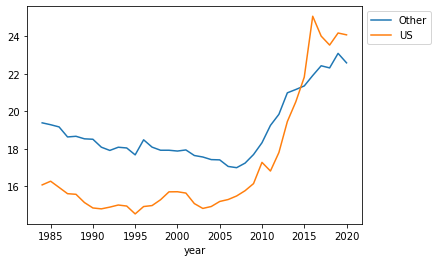

In [113]:
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country']) #these become hierarchichal index in pandas
 .mean()
 .unstack() #see how this changes when you comment this --> which would be wrong. 
 .city08
 .plot()
 .legend(bbox_to_anchor=(1,1))
)

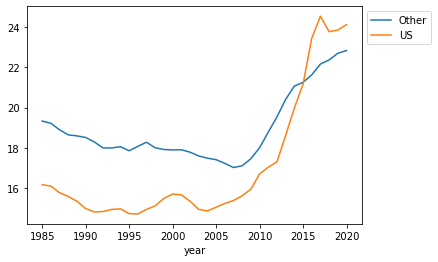

In [120]:
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country']) #these become hierarchichal index in pandas
 .mean()
 .unstack() #see how this changes when you comment this --> which would be wrong. 
 .city08
 .rolling(2)#let's smooth byy taking a 2 year window for averaging
 .mean()
 .plot()
 .legend(bbox_to_anchor=(1,1))
)

In [132]:
#Let's select values above 700
def vals_gt(df_, num):
    return df_[df_.gt(num)].dropna()
#[df_.gt(num)] this above is like building a mask -- like a boolean operation

(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 .count()
 .pipe(vals_gt, 700) #let's use `pipe` to connect what we have manipulated in the data so that it can be passed to the function being called
)

,,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,automatic,speeds,ffs
year,country,,,,,,,,,,,,,,
1984,Other,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1065.0
1985,Other,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,821.0
1991,Other,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
1992,Other,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,707.0
1993,Other,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0
2017,Other,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,766.0
2018,Other,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,844.0
2019,Other,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,855.0


In [131]:
#  autos2.count().gt(1000)